# **Customer Analytics** - Purchase Data
This notebook is using a data of chocolate candy bar purchase information from supermarket customers. Customer segmentation model has been created in the previous notebook (See `customer_segmentation.ipynb`) 
  
### Tasks:
1. Explore
2. Apply segmentation from saved model. See `customer_segmentation.ipynb` notebook for modelling
3. Descriptive Analysis

## Install Pandas Profiling on Colab

In [ ]:
# #install pandas profiling
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

## Import Library

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Explore Data

In [ ]:
#import pandas profiling
from pandas_profiling import ProfileReport

In [2]:
#load data
purchase = pd.read_csv('/content/drive/MyDrive/Course_Data/purchase_data.csv')

In [3]:
purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


Data Dictionary: <br>
<code>Day</code> : The day customer visit the store <br>
<code>Incidence</code> : Whether the customer buy chocolate (1) or not (0) <br>
<code>Brand</code> : The brand customers choose <br>
<code>Last_Inc_...</code> : The previous purchase of customer <br>
<code>Promotion_...</code> : Whether the brand is on promotion (1) / not (0)  <br>

In [4]:
# ProfileReport(purchase, title = 'Customer Purchase Data Report')

## Clustering

In [5]:
#load model 
scaler  = pickle.load(open('/content/drive/MyDrive/Course_Data/scaler.pickle', 'rb'))
pca  = pickle.load(open('/content/drive/MyDrive/Course_Data/pca.pickle', 'rb'))
kmeans  = pickle.load(open('/content/drive/MyDrive/Course_Data/kmeans_pca.pickle', 'rb'))

In [6]:
#segmentation features
feature_cols = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']

#scaling features
seg_features = scaler.transform(purchase[feature_cols])         #the scaler already fitted to the data before

In [7]:
#reduce dimensionality
seg_pca = pca.transform(seg_features)

In [8]:
#create segment
seg_kmeans = kmeans.predict(seg_pca)

In [9]:
#generate new table with cluster info
df = purchase.copy()
df['clusters'] = seg_kmeans 

In [10]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


## Descriptive Analysis

In [11]:
#describe clusters by mean 
df[['clusters', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']].groupby('clusters').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
clusters,,,,,,,
0,0.891034,0.913140,29.472408,1.053947,108731.349418,0.683164,0.412192
1,0.032032,0.159205,37.904050,0.823049,140623.871355,1.288513,1.455965
2,0.274064,0.098674,35.980554,0.766783,96654.659642,0.280391,0.049081
3,0.480296,0.671596,54.937016,2.106916,160577.416181,1.185994,1.102479


0 = Standard/Average <br>
1 = Career-Focused <br>
2 = Fewer-Opportunities <br>
3 = Well-Off

In [12]:
#individual analysis table
df_desc = df.groupby('ID', as_index = False).agg({'Day':'count', 'Incidence':'sum'})
df_desc['avg_n_purchase'] = df_desc['Day']/df_desc['Incidence']
df_clust = df[['ID', 'clusters']].drop_duplicates().reset_index()
df_desc['clusters'] = df_clust['clusters']
df_desc['cluster_name'] = df_desc['clusters'].map({0:'Standard', 1:'Career-Focused', 2:'Fewer-Opportunities', 3:'Well-Off'})
df_desc

,ID,Day,Incidence,avg_n_purchase,clusters,cluster_name
0,200000001,101,9,11.222222,2,Fewer-Opportunities
1,200000002,87,11,7.909091,3,Well-Off
2,200000003,97,10,9.700000,2,Fewer-Opportunities
3,200000004,85,11,7.727273,2,Fewer-Opportunities
4,200000005,111,13,8.538462,1,Career-Focused
...,...,...,...,...,...,...
495,200000496,120,20,6.000000,0,Standard
496,200000497,120,43,2.790698,2,Fewer-Opportunities
497,200000498,131,39,3.358974,0,Standard
498,200000499,106,31,3.419355,2,Fewer-Opportunities


### Segment Proportion

In [13]:
props = df_desc['clusters'].value_counts(normalize = True)
props.index = props.index.map({0:'Standard', 1:'Career-Focused', 2:'Fewer-Opportunities', 3:'Well-Off'})

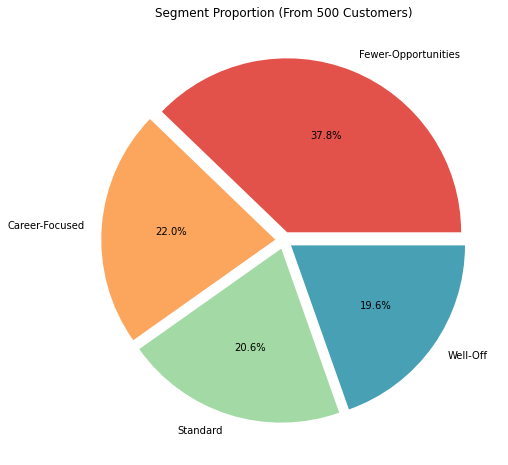

In [14]:
#proportion pie chart
%matplotlib inline
fig = plt.figure(figsize = (8,8))
palette =  sns.color_palette('Spectral')
colors = [palette[0], palette[1], palette[4], palette[5]]          
plt.pie(props,
        autopct = '%1.1f%%',
        colors = colors,
        explode=[0.05]*4,
        labels = props.index)
plt.title('Segment Proportion (From 500 Customers)')
plt.show()

### Customers Visit

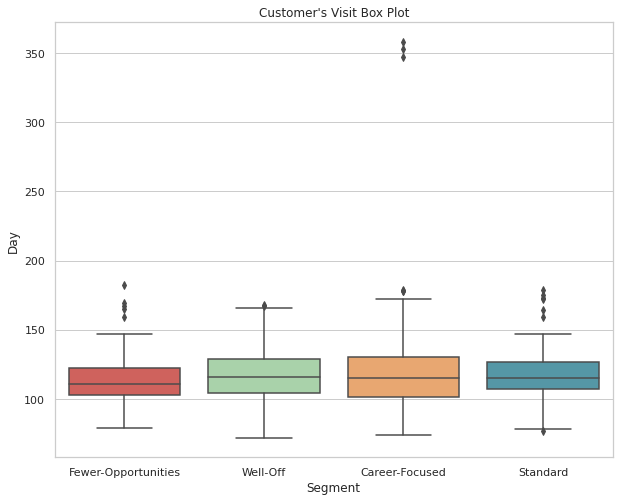

In [15]:
#barplot of customers number of visit
sns.set_theme(style="whitegrid")
fig, ax  = plt.subplots(figsize = (10,8))
palettes = {'Fewer-Opportunities':palette[0], 'Career-Focused': palette[1], 'Well-Off':palette[4], 'Standard':palette[5] }
sns.boxplot(x = 'cluster_name', y = 'Day', data = df_desc, palette = palettes)
ax.set_xlabel('Segment')
plt.title("Customer's Visit Box Plot")
plt.show()

### Customers Purchase

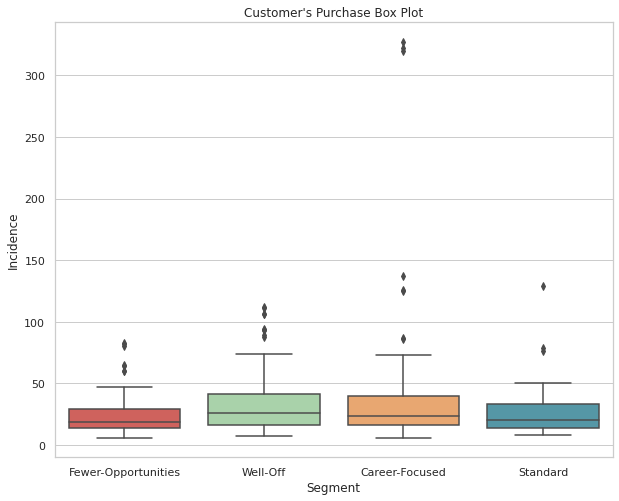

In [16]:
#barplot of customers number of purchase
sns.set_theme(style="whitegrid")
fig, ax  = plt.subplots(figsize = (10,8))
sns.boxplot(x = 'cluster_name', y = 'Incidence', data = df_desc, palette = palettes)
ax.set_xlabel('Segment')
plt.title("Customer's Purchase Box Plot")
plt.show()

### Brand Choice

In [17]:
#create buy only, brand choice table
df['cluster_name'] = df['clusters'].map({0:'Standard', 1:'Career-Focused', 2:'Fewer-Opportunities', 3:'Well-Off'})
df_buy = df[df['Incidence'] == 1]
df_brand = pd.get_dummies(df_buy['Brand'], prefix = 'Brand', prefix_sep = '_' )
df_brand['clusters'] =  df_buy['cluster_name']
df_brand.sample(10)

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,clusters
25648,1,0,0,0,0,Fewer-Opportunities
20816,0,1,0,0,0,Fewer-Opportunities
7570,0,0,0,1,0,Career-Focused
23030,0,1,0,0,0,Fewer-Opportunities
36366,0,1,0,0,0,Well-Off
24077,0,0,0,0,1,Career-Focused
12905,0,0,0,0,1,Well-Off
21131,0,0,0,0,1,Fewer-Opportunities
37870,1,0,0,0,0,Well-Off
31318,0,0,0,0,1,Career-Focused


In [18]:
df_brand.groupby('clusters').mean()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
clusters,,,,,
Career-Focused,0.039489,0.092901,0.026250,0.079206,0.762155
Fewer-Opportunities,0.118112,0.687747,0.027203,0.061381,0.105557
Standard,0.205458,0.353996,0.203119,0.049513,0.187914
Well-Off,0.041876,0.079328,0.025951,0.645532,0.207313


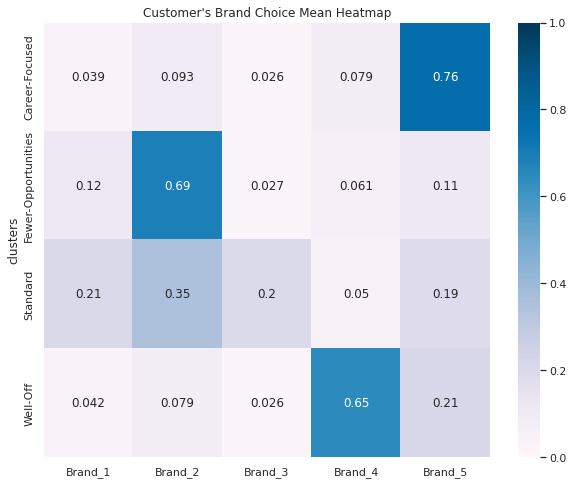

In [19]:
#create heatmap
fig, ax  = plt.subplots(figsize = (10,8))
sns.heatmap(df_brand.groupby('clusters').mean(),
            vmin = 0, vmax = 1,
            cmap = 'PuBu',
            annot = True,
            )
plt.title("Customer's Brand Choice Mean Heatmap")
plt.show()

Insights: <br>
1. The **Career-Focused** segment loves the *fancy* brand of chocolate. This result leads to speculation that the **Career-Focused** segment loves the luxury stuff. From this, we have an opportunity to raise the price of brand_5 chocolate even more.  
2. The **Fewer-Opportunity** segment enjoys the *brand_2* chocolate. This result leads to speculation that the price of chocolate doesn't affect the brand choice too much
3. The **Standard** segment enjoys differents kind of chocolate. This result gives us some actionable insights that we can influence this segment to try out different brands. 


### Revenue Analysis

In [20]:
#create revenue table
def rev_table(data,n):
  df = data.copy()
  price_cols = 'Price_' + str(n)
  rev_cols = 'rev_' + str(n)
  df[rev_cols] = df[price_cols]*df['Quantity']
  df_n = df[df['Brand'] == n][['cluster_name', rev_cols]]
  df_rev = df_n.groupby('cluster_name').sum()
  return df_rev

rev = [rev_table(df, n) for n in range(1,6)]

In [21]:
df_rev = pd.concat(rev, axis = 1)
df_rev['total_rev'] = df_rev.sum(axis = 1)
df_rev.loc['Total'] = df_rev.sum()
df_rev

,rev_1,rev_2,rev_3,rev_4,rev_5,total_rev
cluster_name,,,,,,
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31
Total,6305.65,21768.31,6021.52,19040.10,29621.00,82756.58


Insights:
1. 3rd brand has the lowest revenue compared to others with the highest contributor from **Standard** segment. According to previous insights, we can reduce the price of the 3rd brand to influence the **Standard** segment to try this 3rd brand and increase it's revenue.   
2. **Well-Off** loves the 4th brand. Maybe it is the best tasting chocolate since the price seems not a necessary aspect for the well-off. From this, we can increase the price of the 4th brand.